In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, convolve


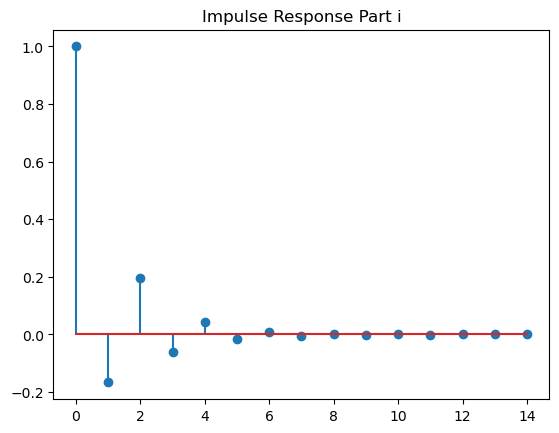

In [23]:
#A1-i
#using student number f=5 g= 0 h=1

a = [1,1/6,-1/6]
b=[1]

n = 15
impulse = np.zeros(n)
impulse[0] = 1

h = lfilter(b, a, impulse)

plt.figure()
plt.stem(np.arange(n),h)
plt.title('Impulse Response Part i')
plt.show()

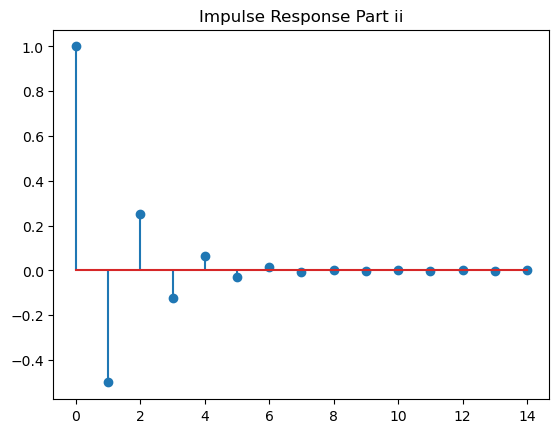

In [24]:
#A1-ii
#using student number f=5 g= 0 h=1

a = [1,1/2]
b=[1]

n = 15
impulse = np.zeros(n)
impulse[0] = 1

h = lfilter(b, a, impulse)

plt.figure()
plt.stem(np.arange(n),h)
plt.title('Impulse Response Part ii')
plt.show()

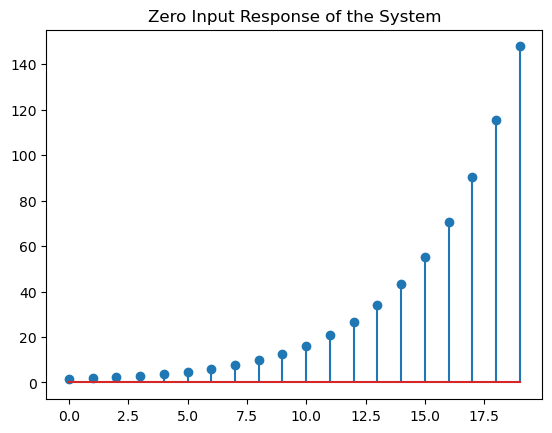

In [25]:
#B
#using student number D=5

a = [1, -6/5, -1/10]
b = [2]
y_initial = [1,2]
zi = lfiltic(b, a, y_initial)


n=np.arange(20)
x = np.zeros_like(n)

y, zf = lfilter(b,a,x, zi=zi)


plt.figure()
plt.stem(n, y)
plt.title('Zero Input Response of the System')
plt.show()


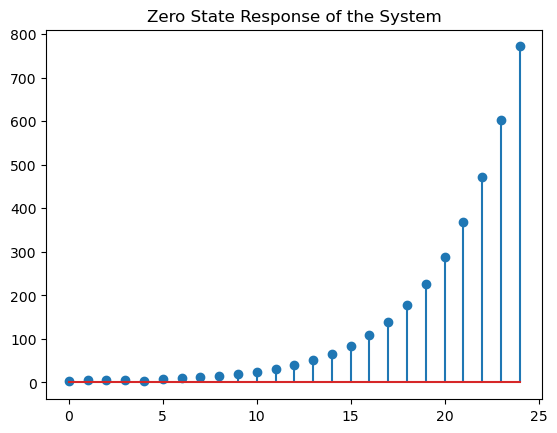

In [37]:
#C-1
# D = 5 from student number

a = [1, -1.2, -0.1]
b = [2]
y_initial = [1,2]
zi = lfiltic(b, a, y_initial)


D = 5
n = np.arange(25)
x = 2 * np.cos((2 * np.pi * n) / (D+1)) * (np.heaviside(n, 1) - np.heaviside(n - (D + 1), 1))

y, zf = lfilter(b,a,x, zi=zi)


y= lfilter(b,a,x)


plt.figure()
plt.stem(n,y)
plt.title('Zero State Response of the System')
plt.show()

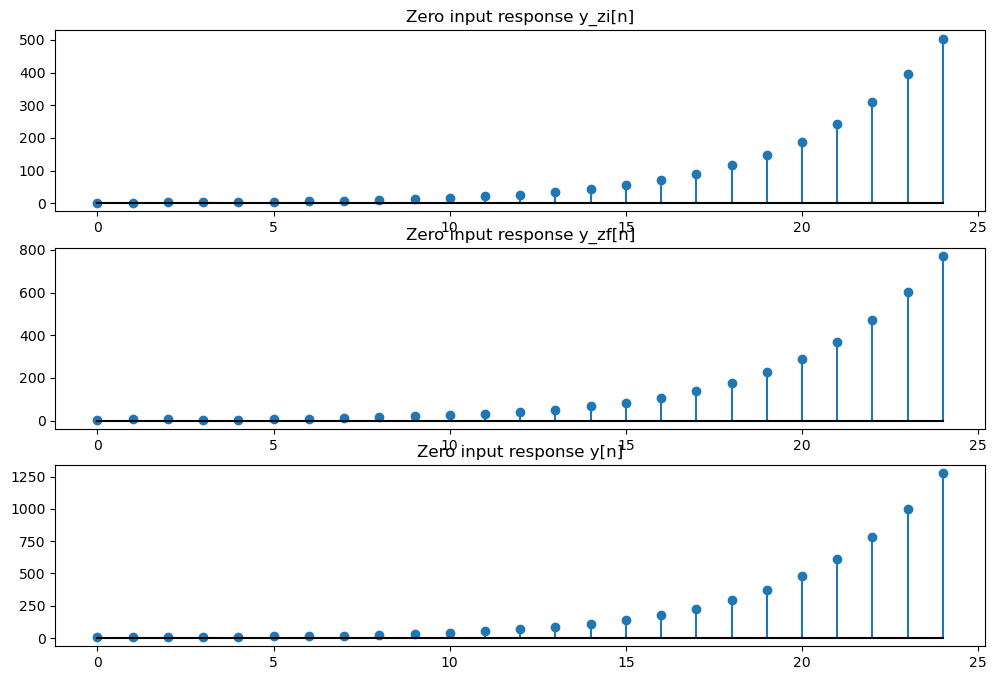

In [27]:
#D1
a = [1, -6/5, -1/10]
b = [2]


D = 5
n = np.arange(25)
x = 2 * np.cos((2 * np.pi * n) / (D + 1)) * (np.heaviside(n, 1) - np.heaviside(n - (D+1), 1))

y_initial = [1,2]
zi = lfiltic(b, a, y_initial)
x_zi = np.zeros(n.shape)
y_zi, _ = lfilter(b,a, x_zi, zi=zi)
y_zf= lfilter(b,a,x)
y = y_zi + y_zf


plt.figure(figsize=(12,8))
plt.subplot(3, 1, 1)
plt.stem(n,y_zi, basefmt="k-")
plt.title('Zero input response y_zi[n]')

plt.subplot(3,1,2)
plt.stem(n, y_zf, basefmt="k-")
plt.title('Zero input response y_zf[n]')

plt.subplot(3,1,3)
plt.stem(n, y, basefmt="k-")
plt.title('Zero input response y[n]')
plt.show()

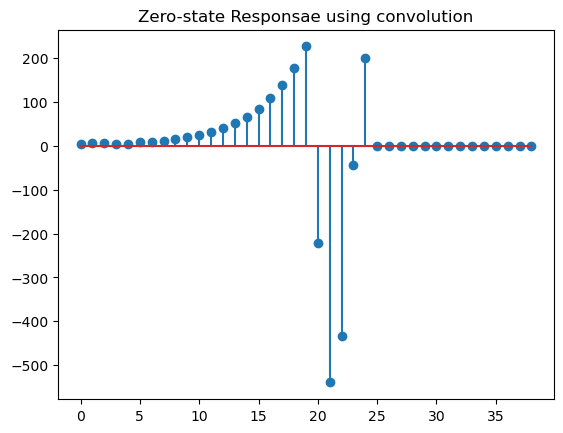

In [28]:
#E1 
a = [1, -6/5, -1/10]
b = [2]

impulse =   np.zeros(20)
impulse[0] = 1
h1 = lfilter(b, a, impulse)

D = 5
n = np.arange(20)
x = 2 * np.cos((2 * np.pi * n) / (D+1)) * (np.heaviside(n, 1) - np.heaviside(n - (D + 1), 1))

y_conv = convolve(x, h1)

plt.figure()
plt.stem(y_conv)
plt.title('Zero-state Responsae using convolution')
plt.show()


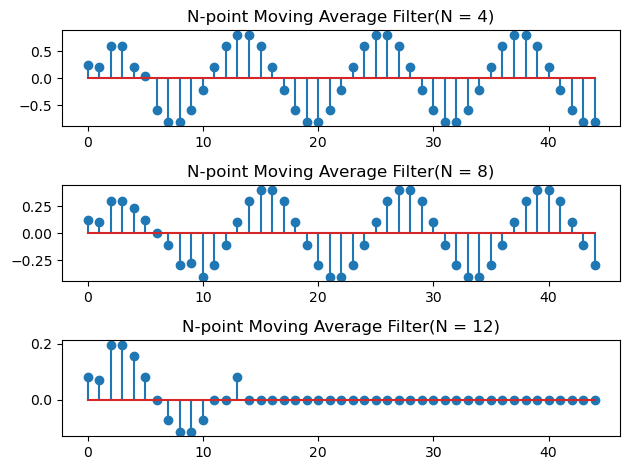

In [22]:
#F
D = 5
G = 0
H = 1
n = np.arange(45)
x = np.cos(np.pi * n / (D+1)) - np.where(n == (G + 1), 1, 0) + np.where(n==(H + 1), 1, 0)

def filter_avg(N):
    b = np.ones(N) / N
    a = np.array([1])
    return b, a

def plot(x, Nval):
    for i, N in enumerate(Nval, start = 1):
        b, a = filter_avg(N)
        y = lfilter(b,a,x)

        plt.subplot(len(Nval), 1, i)
        plt.stem(n,y)
        plt.title(f'N-point Moving Average Filter(N = {N})')

    plt.tight_layout()
    plt.show()

plot(x, [4, 8, 12])